In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Read Data
df = pd.read_csv("../data/processed/standardized_data.csv") # Ensure we are using standardized data 

# Split feature and target variables
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

# Divide the training set and the test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Used to calculate the AUC score

# Output evaluation index
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       122
           1       0.85      0.78      0.81        78

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200

Confusion Matrix:
 [[111  11]
 [ 17  61]]
AUC Score: 0.9510298444724674


Cross-Validation Scores: [1.    0.995 1.    1.    1.   ]
Average Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.97      0.99        78

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
 [[122   0]
 [  2  76]]
AUC-ROC: 1.0
Heart Disease
0    608
1    392
Name: count, dtype: int64

Sample Features: {'Age': 79.0, 'Cholesterol': 222.0, 'Blood Pressure': 150.0, 'Heart Rate': 65.0, 'Exercise Hours': 6.0, 'Stress Level': 1.0, 'Blood Sugar': 71.0, 'Gender_Male': True, 'Smoking_Former': False, 'Smoking_Never': False, 'Alcohol Intake_Moderate': True, 'Family History_Yes': False, 'Diabetes_Yes': True, 'Obesity_Yes': True, 'Exercise Induced Angina_Yes': False, 'Chest Pain Type_Atypical Angina': False, 'Chest Pain Type_Non-anginal Pain': 

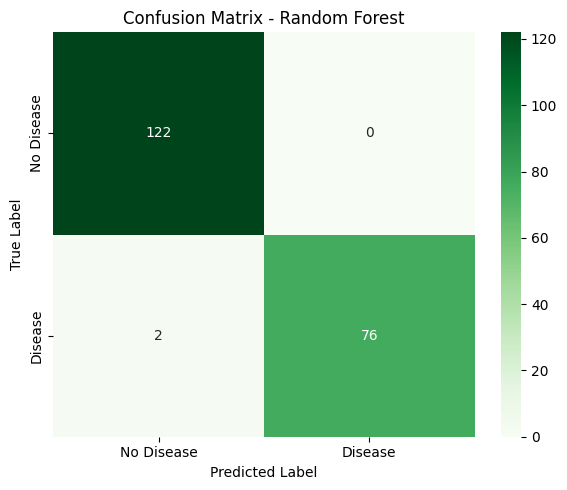

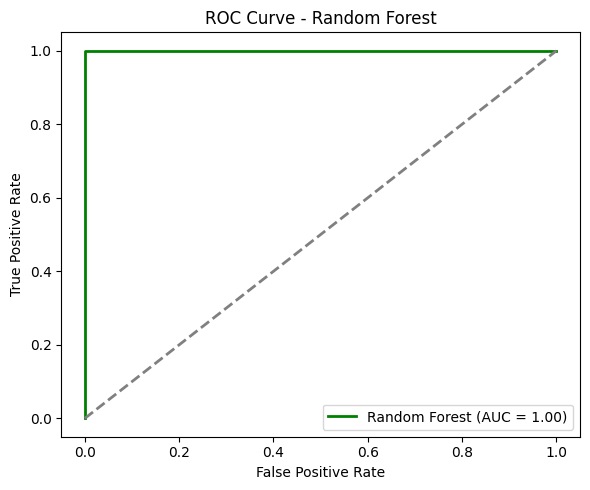

In [23]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Read Data
df = pd.read_csv("../data/processed/cleaned_data.csv")
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Training model
rf_model = RandomForestClassifier(
    class_weight="balanced",  # Handle class imbalance 
    n_estimators=50,          # More trees
    max_depth=5,              # Limit depth to avoid overfitting
    min_samples_split=10,     # Minimum samples required to split a node
    min_samples_leaf=5,       # Minimum samples required in a leaf node
    random_state=42
   )
rf_model.fit(X_train, y_train)

# Forecast
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]



# Generate confusion matrix graph
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()

# Generate AUC-ROC curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='green', lw=2,
         label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.tight_layout()


#Validation performance with cross- validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

# Output evaluation index
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

print(df["Heart Disease"].value_counts())


# Sample prediction from row 5 (index 4)
sample = X_test.iloc[4:5]  # Keep as DataFrame to match model input format
prediction = rf_model.predict(sample)
# Sample prediction from the test set (using the first row of X_test)
sample = X_test.iloc[0:1]  # Keep as DataFrame to match model input format
prediction = rf_model.predict(sample)

# Retrieve and display the sample as a dictionary for easy reading
sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Features: {sample_dict}")
print(f"Predicted Heart Disease Status: {'Disease' if prediction[0] == 1 else 'No Disease'}")



1. LOADING AND EXPLORING DATA
--------------------------------------------------
Dataset Shape: (1000, 16)

First 5 rows of the dataset:
   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female        228.0           119.0          66  Current   
1   48    Male        204.0           165.0          62  Current   
2   53    Male        234.0            91.0          67    Never   
3   69  Female        192.0            90.0          72  Current   
4   62  Female        172.0           163.0          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               0             No       No     Yes   
1            NaN               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3            NaN               4             No      Yes      No   
4            NaN               6             No      Yes      No   

   Stress Level  Blood Sugar Exercise Induced

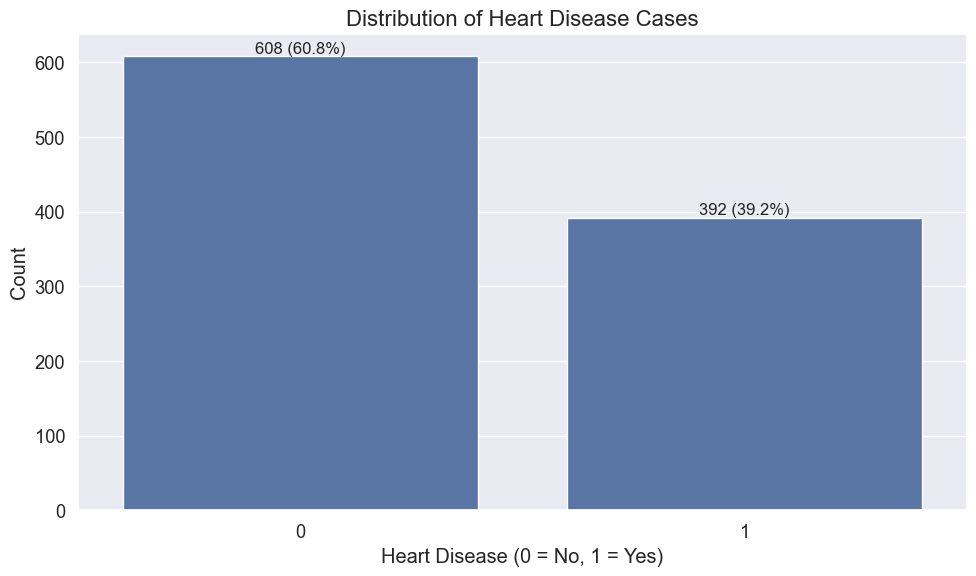

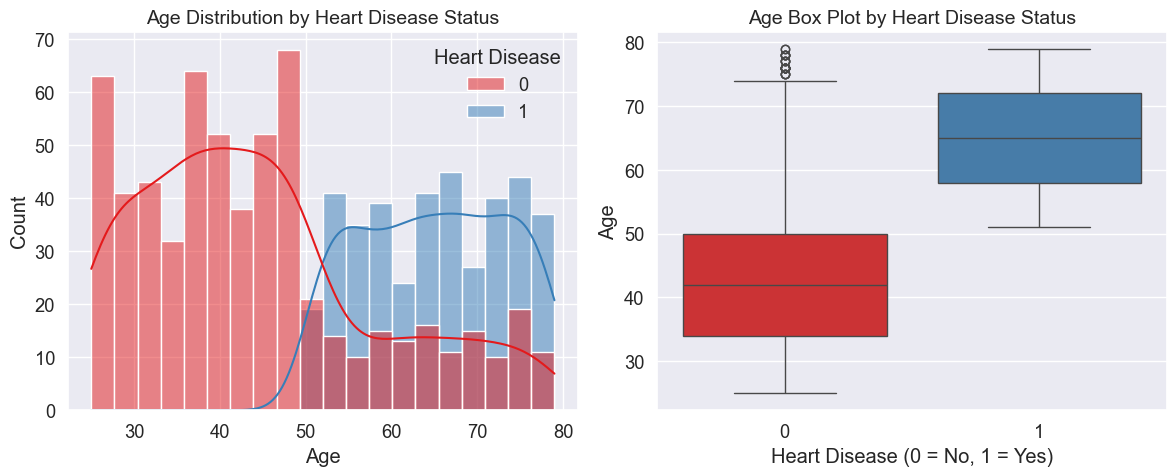


Age Statistics by Heart Disease Status:
                mean  median  min  max    std
Heart Disease                                
0              44.13    42.0   25   79  13.81
1              64.96    65.0   51   79   8.46


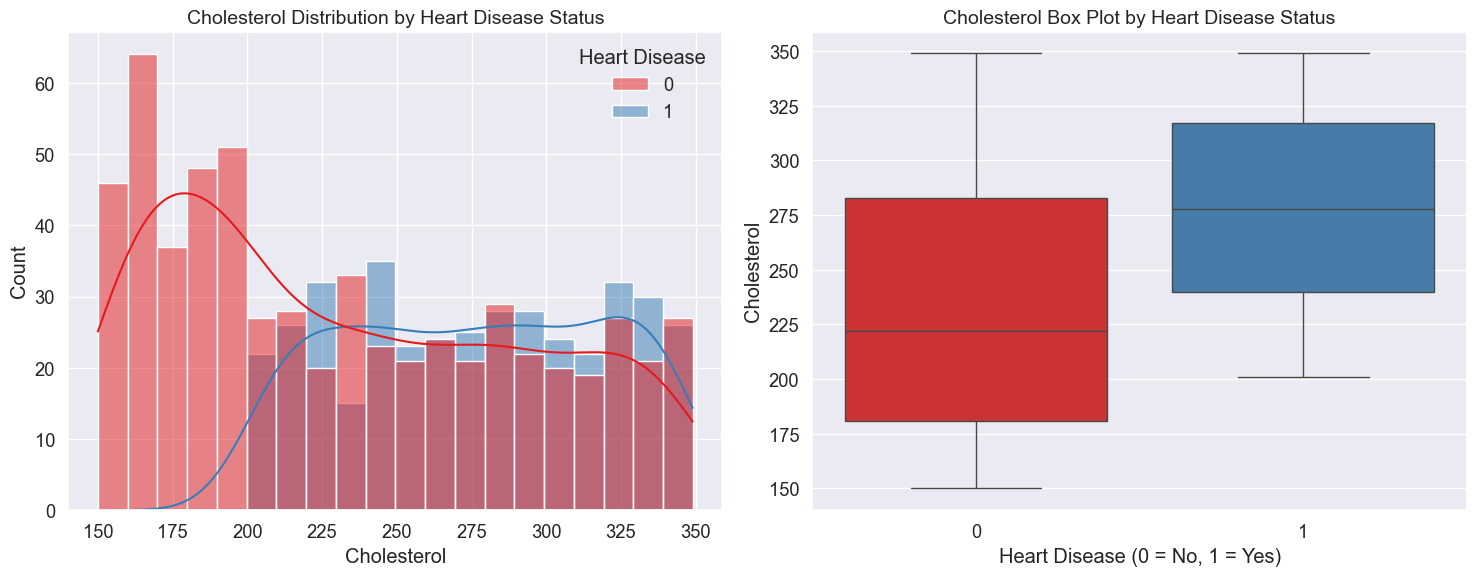


Cholesterol Statistics by Heart Disease Status:
                 mean  median    min    max    std
Heart Disease                                     
0              233.04   222.0  150.0  349.0  59.74
1              276.26   278.0  201.0  349.0  43.43


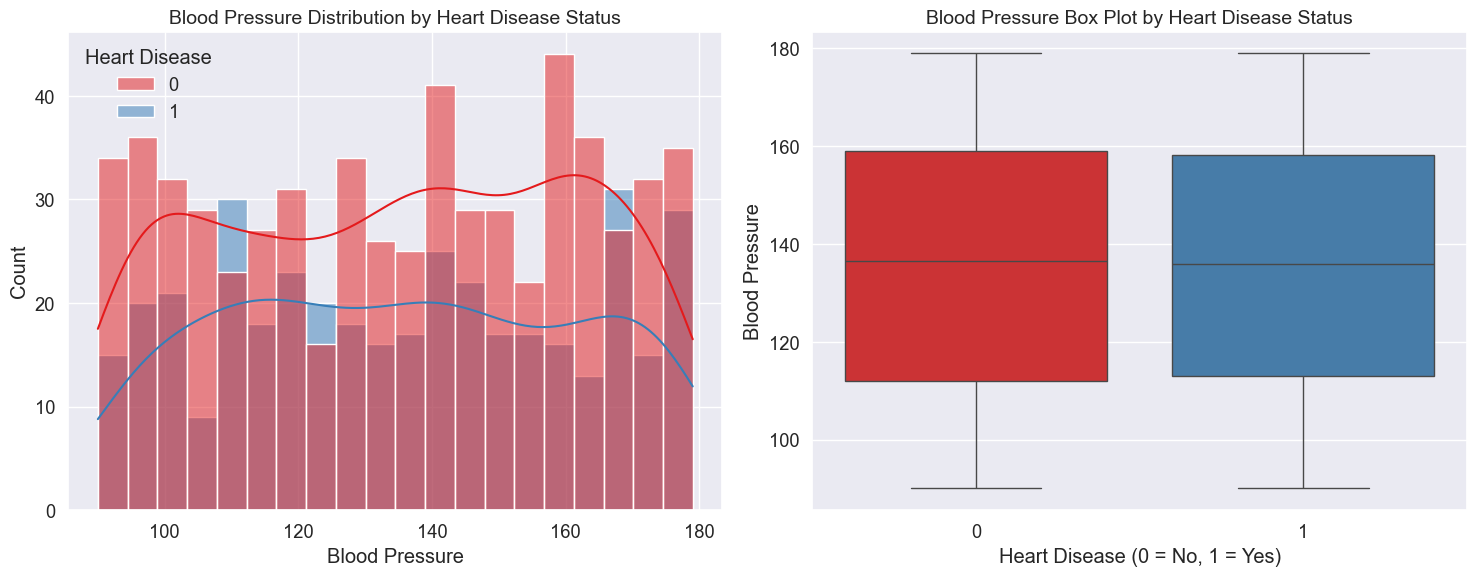


Blood Pressure Statistics by Heart Disease Status:
                 mean  median   min    max    std
Heart Disease                                    
0              135.13   136.5  90.0  179.0  26.55
1              135.71   136.0  90.0  179.0  26.04


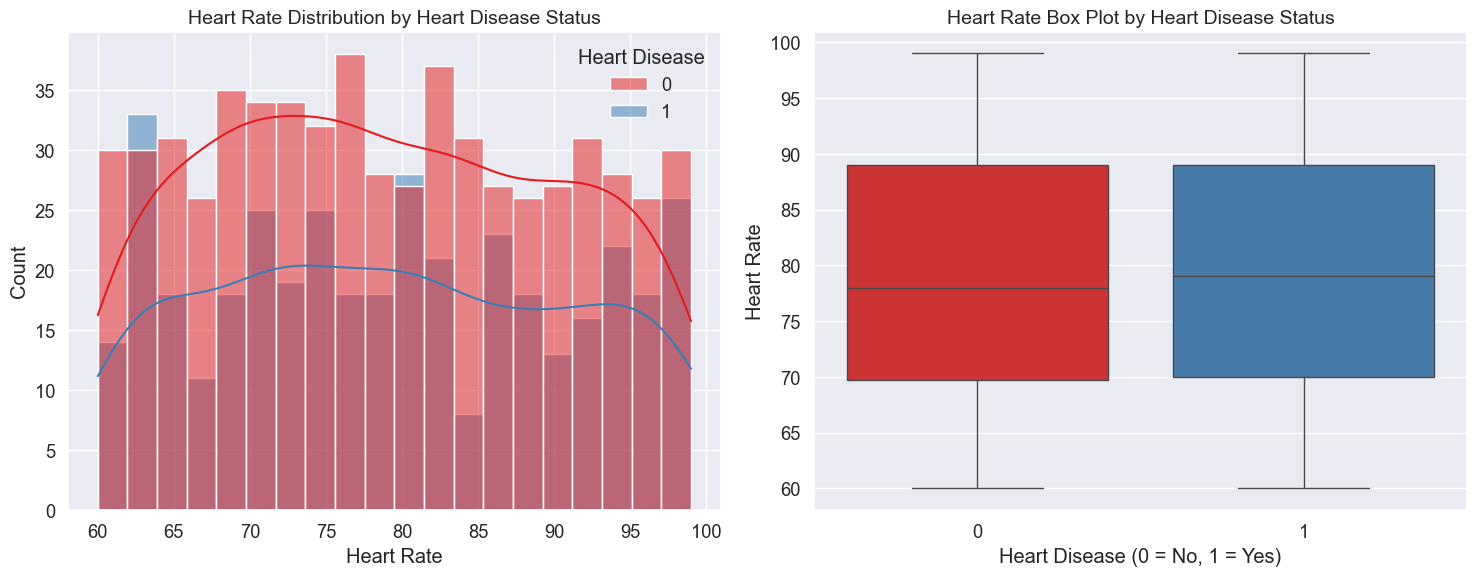


Heart Rate Statistics by Heart Disease Status:
                mean  median  min  max    std
Heart Disease                                
0              79.08    78.0   60   99  11.36
1              79.39    79.0   60   99  11.70


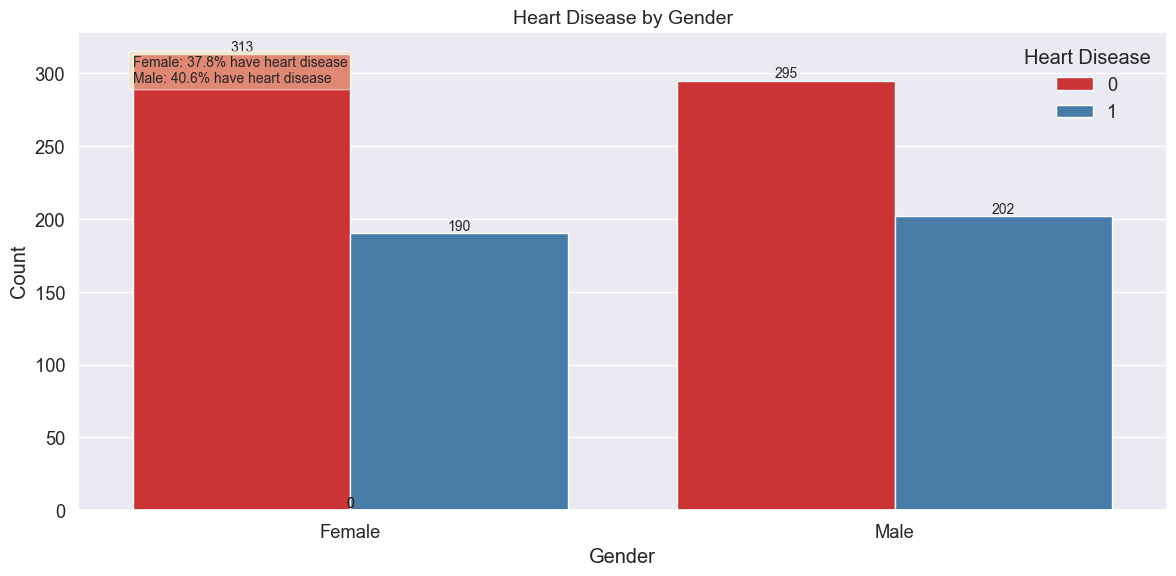

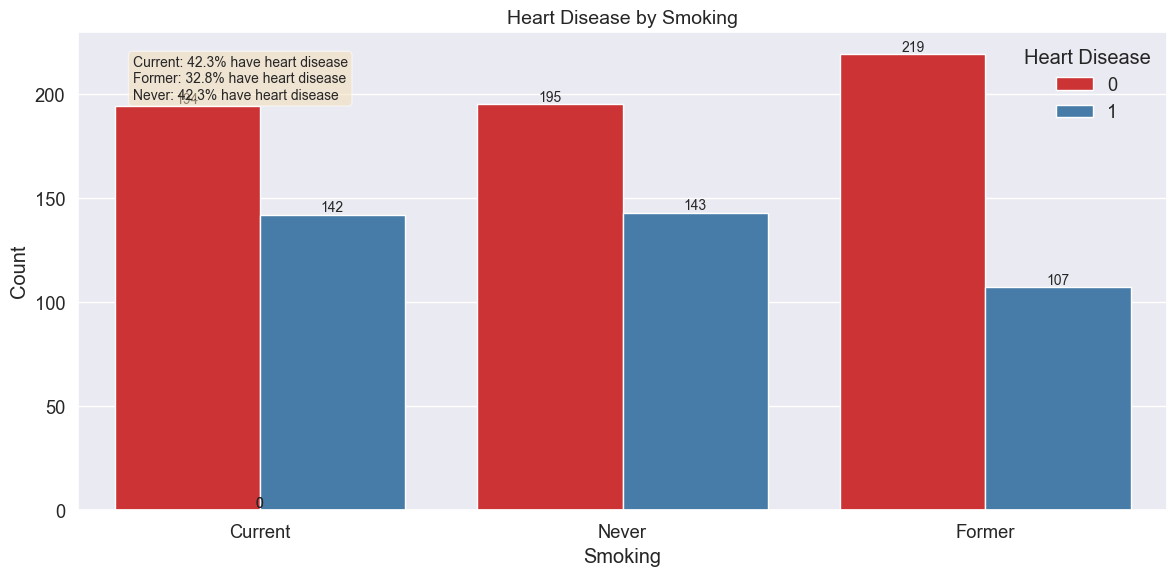

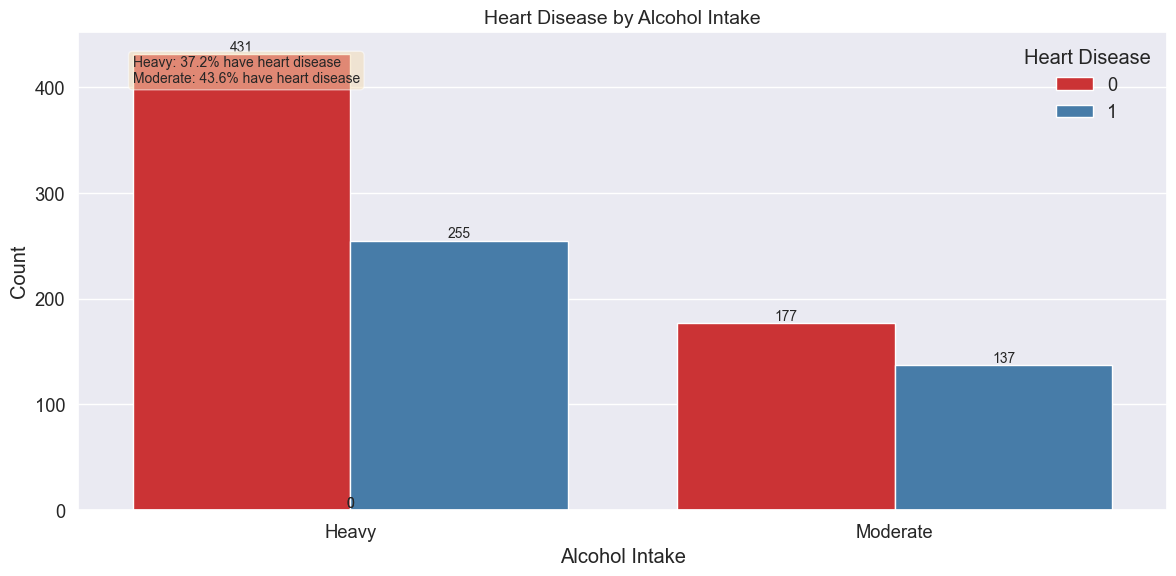

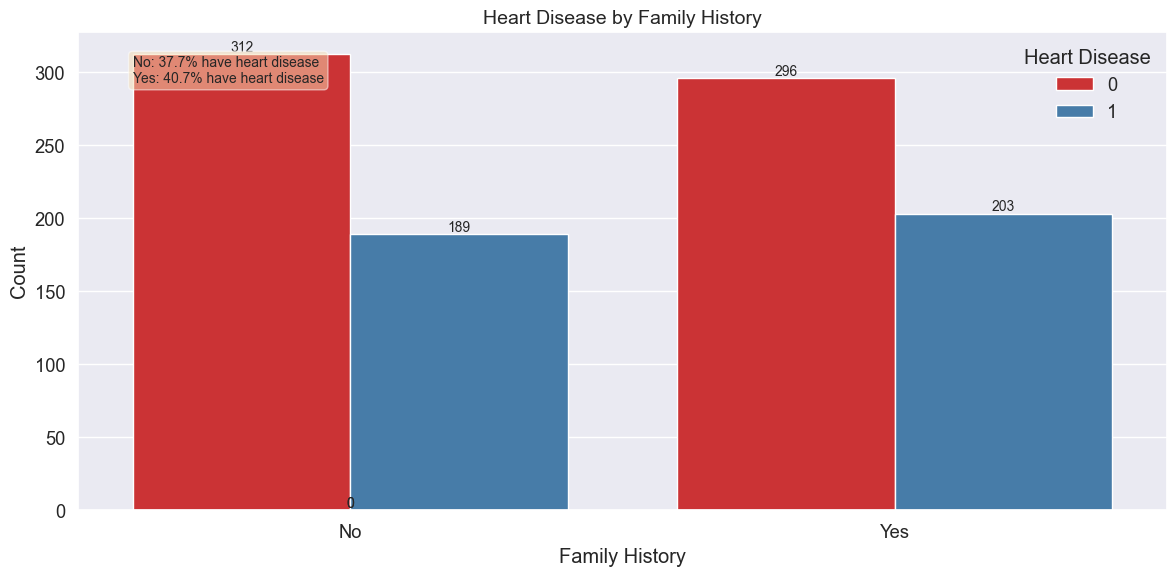

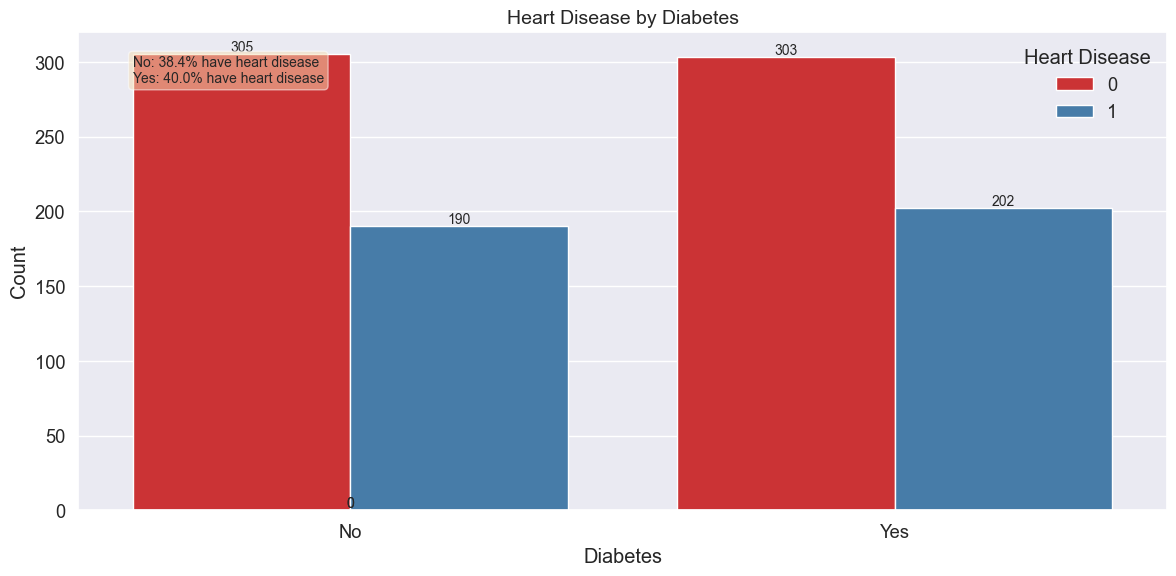

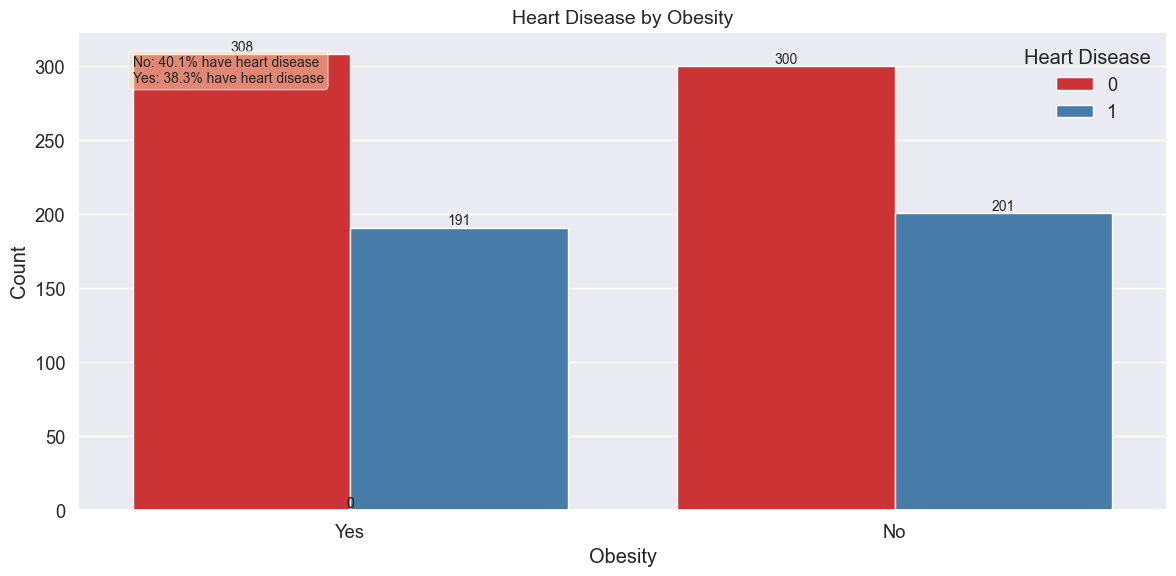

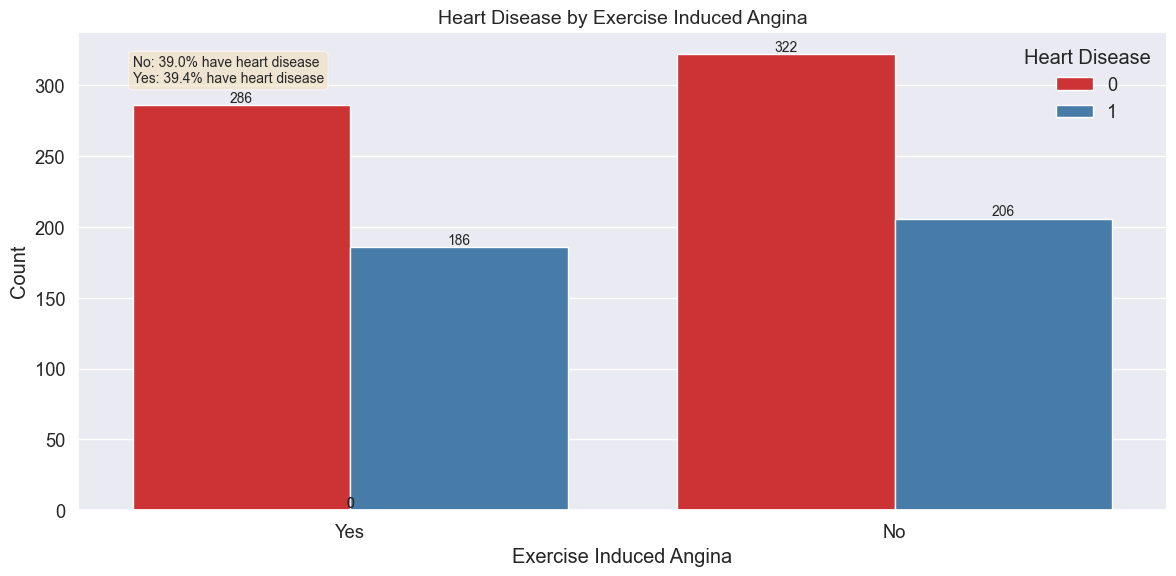

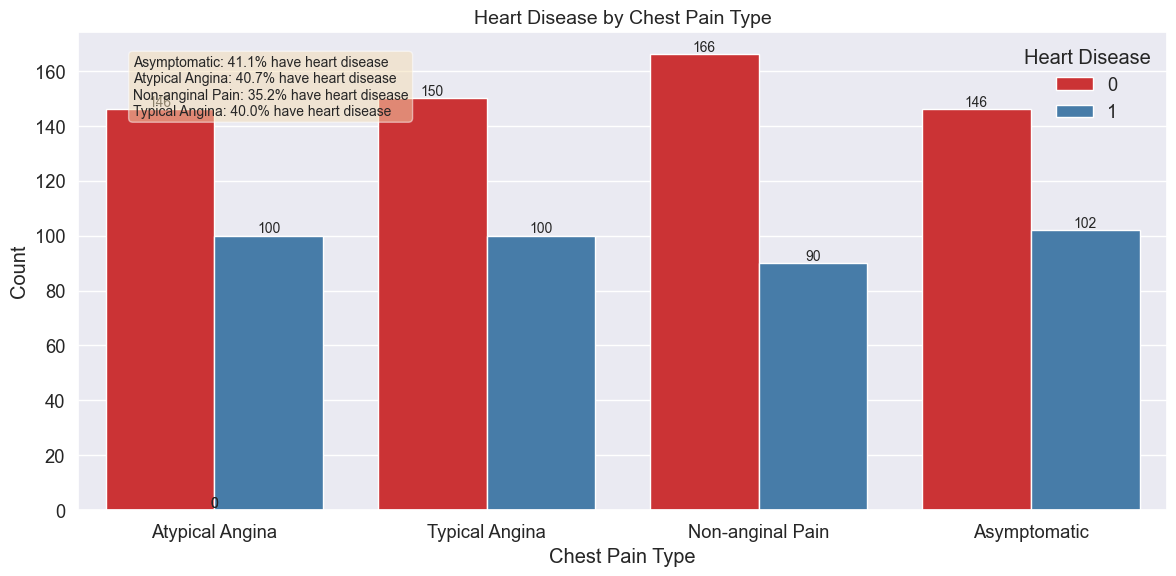

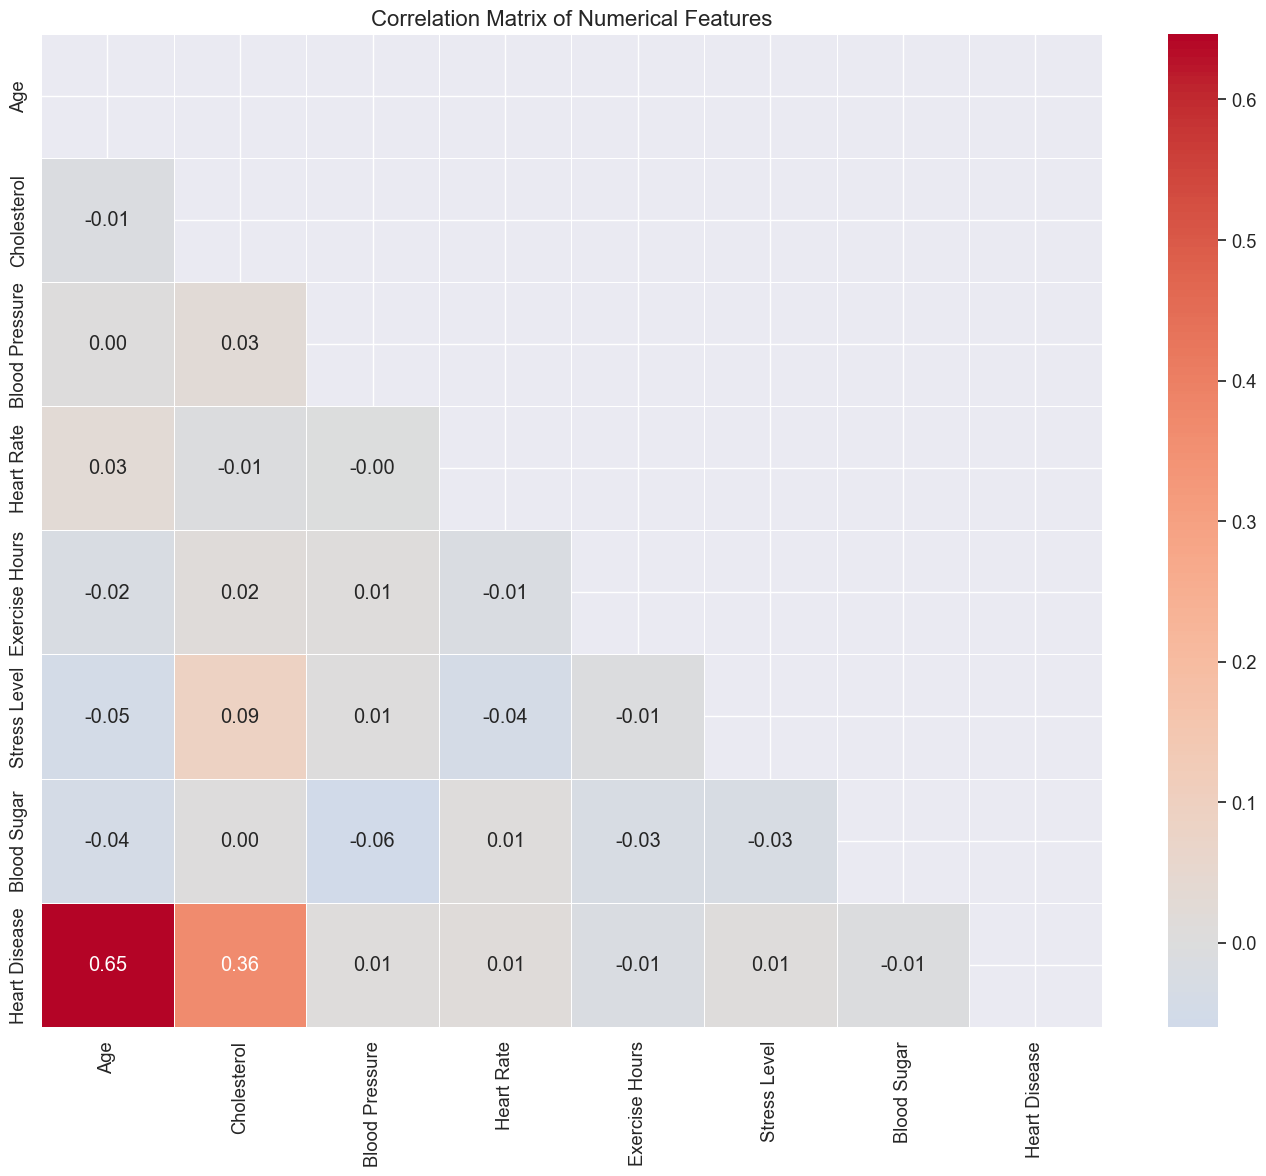


Correlation with Heart Disease (sorted):
Age               0.646871
Cholesterol       0.364572
Heart Rate        0.013209
Blood Pressure    0.010633
Stress Level      0.007071
Blood Sugar      -0.006375
Exercise Hours   -0.014781
Name: Heart Disease, dtype: float64


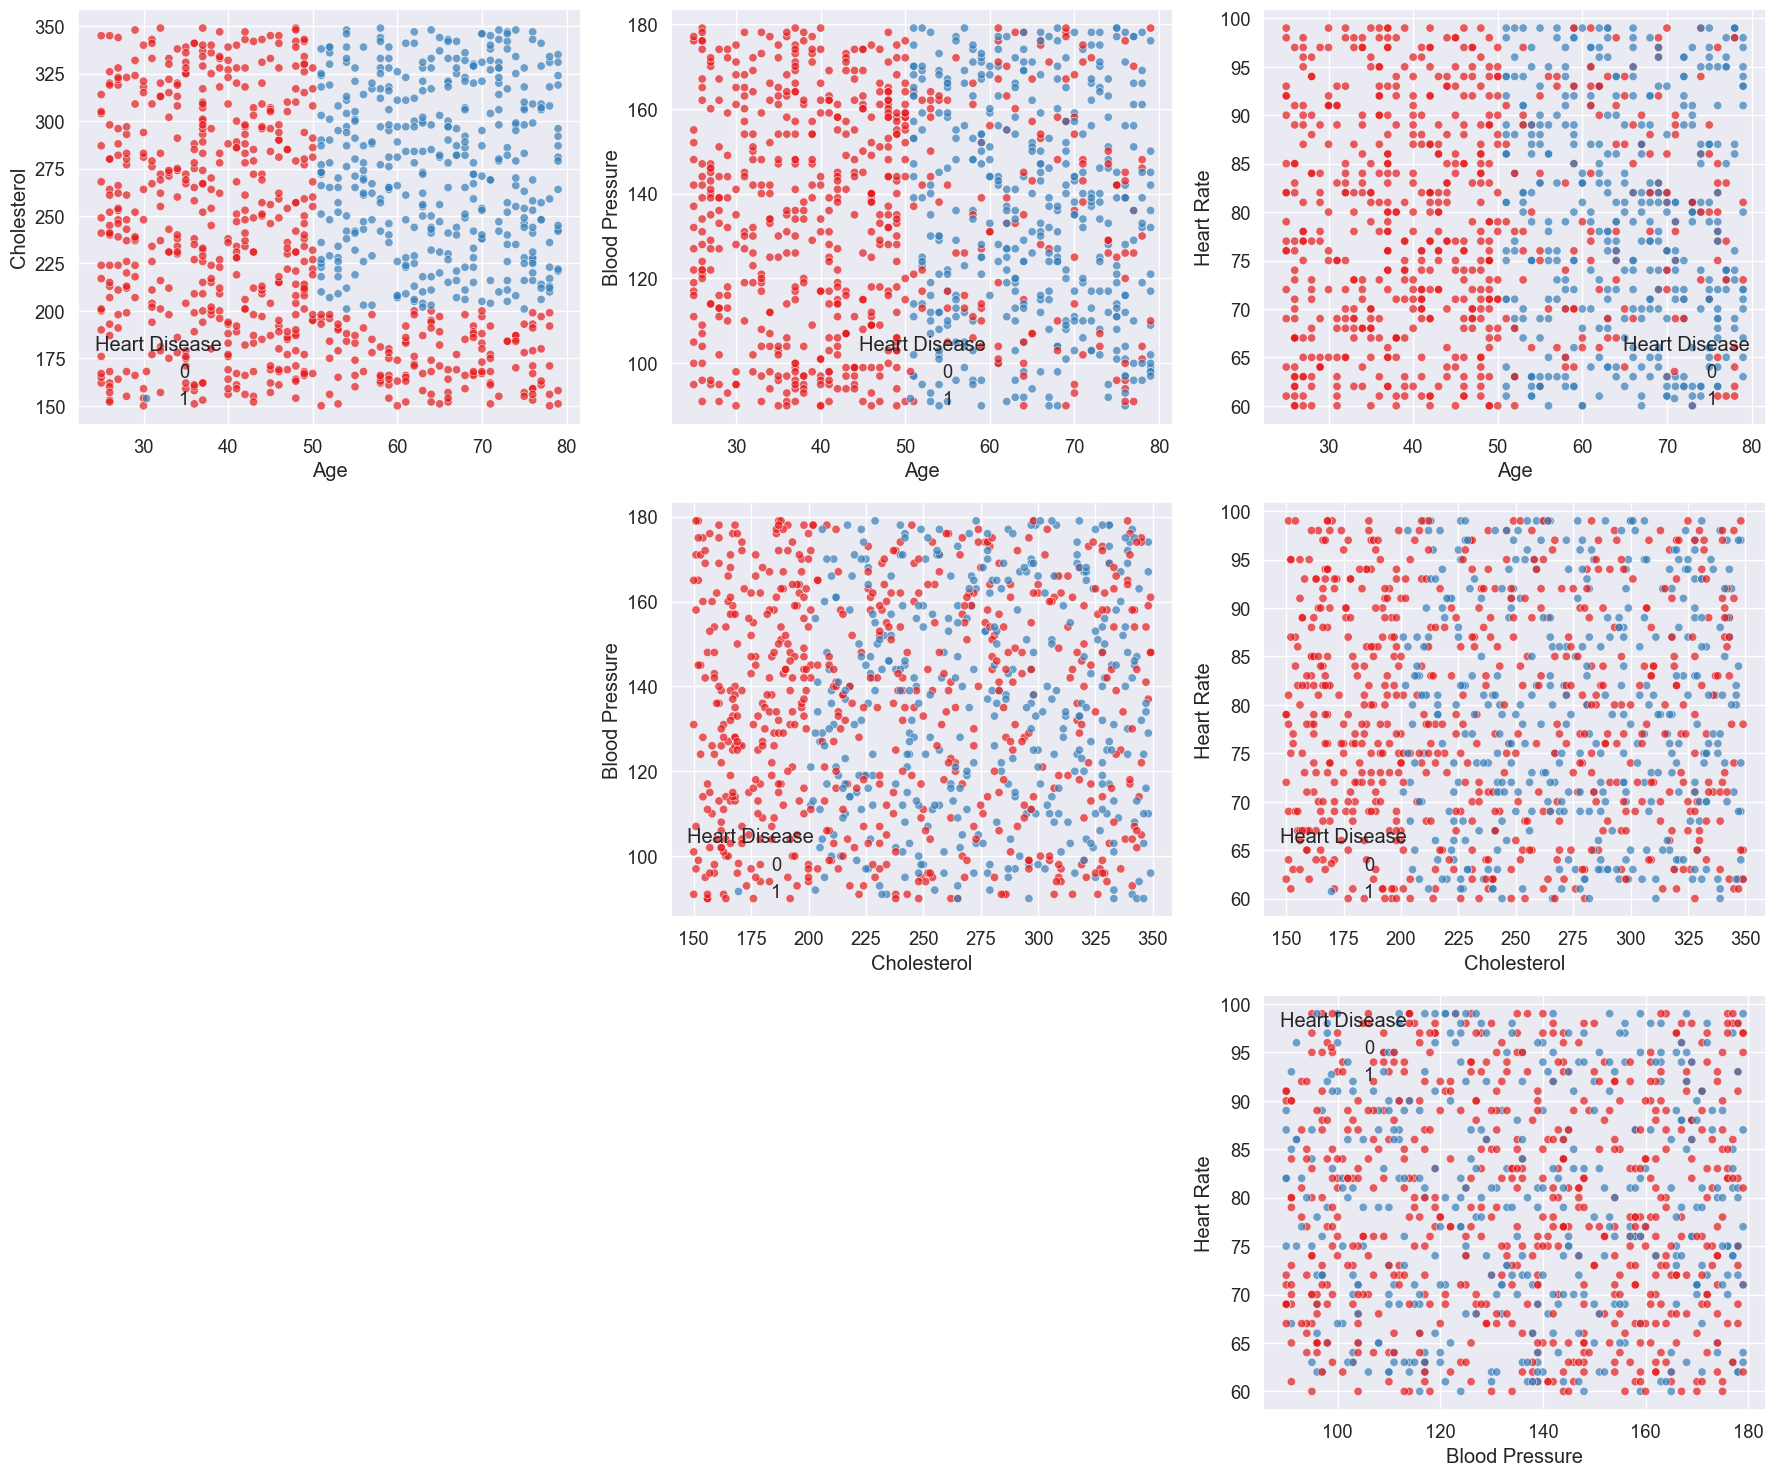



4. FEATURE ENGINEERING & PREPROCESSING
--------------------------------------------------
Categorical columns: ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']
Numerical columns: ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']
Preprocessed data saved to: ../data/processed/heart_disease_scaled.csv

Training set shape: (800, 15)
Testing set shape: (200, 15)

Class distribution in training set:
Heart Disease
0    60.75
1    39.25
Name: proportion, dtype: float64

Class distribution in testing set:
Heart Disease
0    61.0
1    39.0
Name: proportion, dtype: float64


5. MODEL BUILDING AND EVALUATION
--------------------------------------------------

Training and evaluating Logistic Regression...
Cross-validation F1 scores: [0.80327869 0.79032258 0.81300813 0.83211679 0.83606557]
Mean CV F1 score: 0.8150 ± 0.0172
Test Accuracy: 0.8600
Test Precision: 0.8472

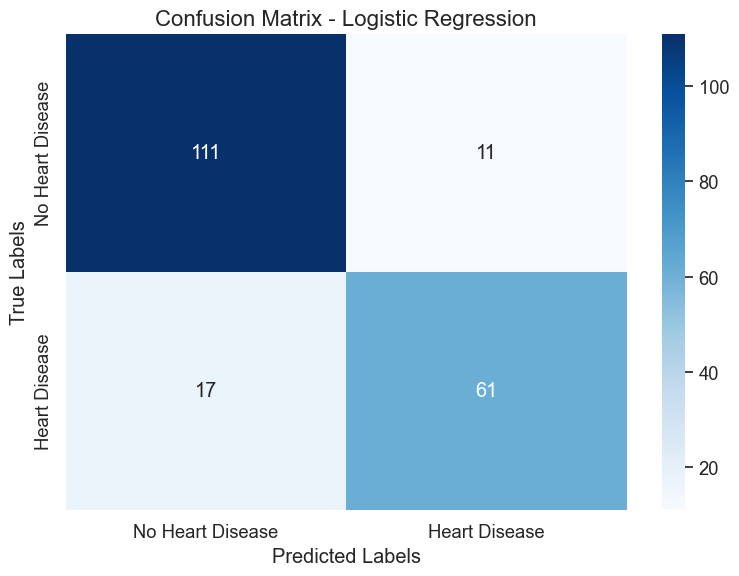


Training and evaluating Random Forest...
Cross-validation F1 scores: [1.    0.992 1.    1.    1.   ]
Mean CV F1 score: 0.9984 ± 0.0032
Test Accuracy: 0.9950
Test Precision: 1.0000
Test Recall: 0.9872
Test F1 Score: 0.9935
Test ROC-AUC: 1.0000

Confusion Matrix:
[[122   0]
 [  1  77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.99      0.99        78

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



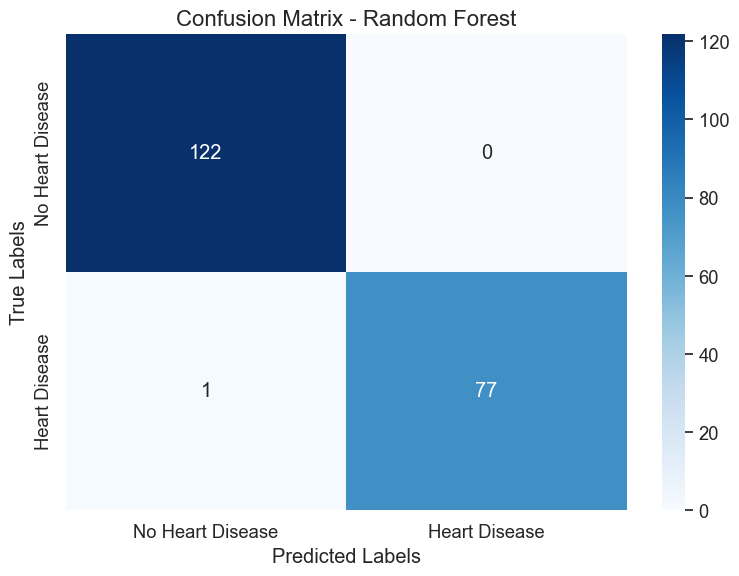


Training and evaluating XGBoost...
Cross-validation F1 scores: [1.       1.       1.       1.       0.984375]
Mean CV F1 score: 0.9969 ± 0.0063
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000
Test ROC-AUC: 1.0000

Confusion Matrix:
[[122   0]
 [  0  78]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



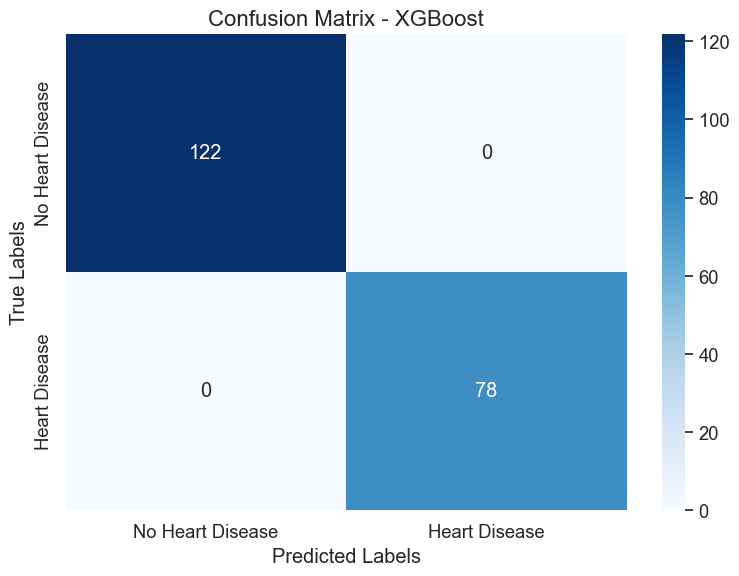


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
2              XGBoost     1.000   1.000000  1.000000  1.000000  1.000000
1        Random Forest     0.995   1.000000  0.987179  0.993548  1.000000
0  Logistic Regression     0.860   0.847222  0.782051  0.813333  0.950925


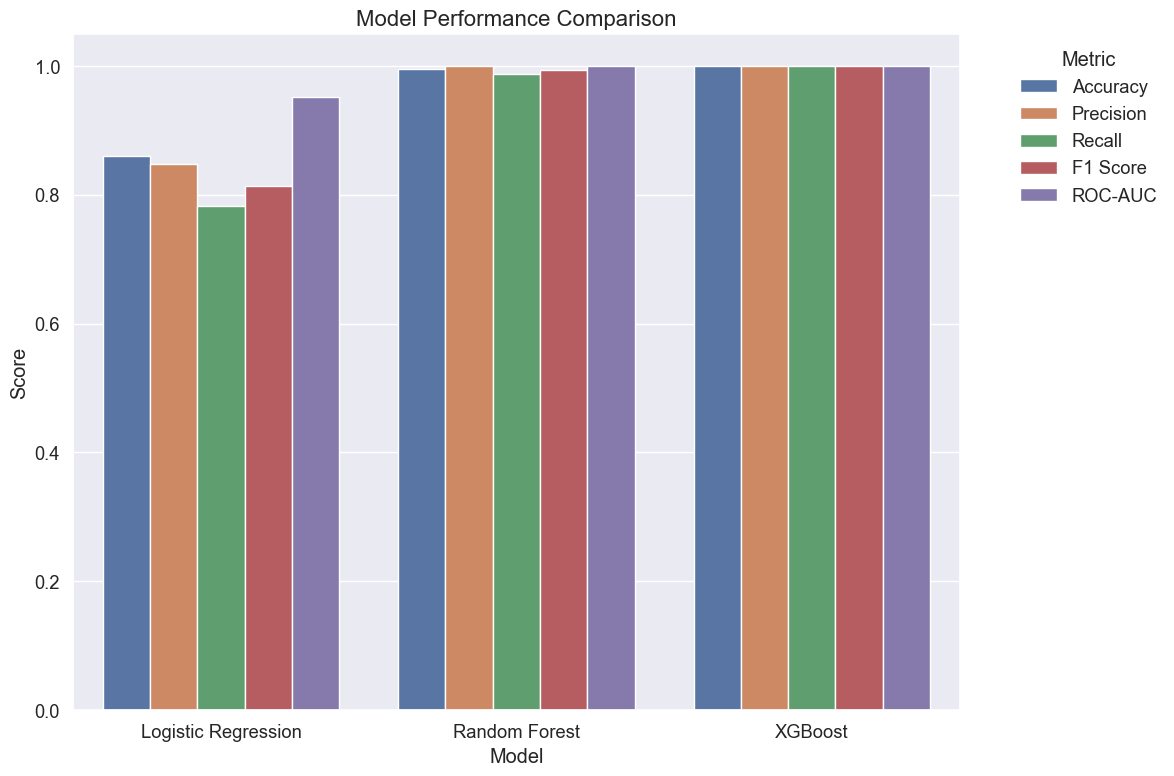

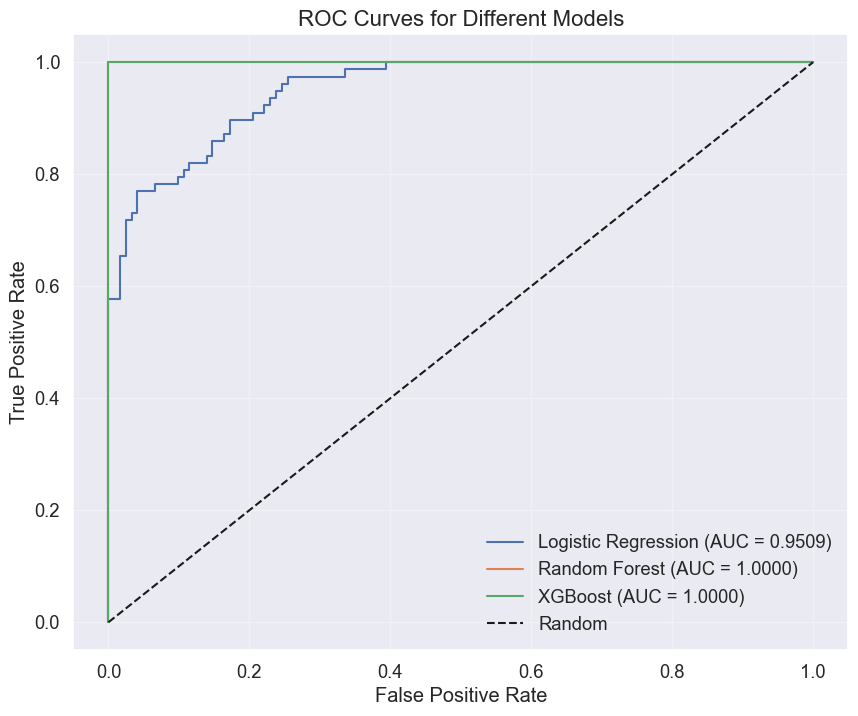



6. HYPERPARAMETER TUNING
--------------------------------------------------
Best performing model: XGBoost
Performing grid search for XGBoost...
Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Best hyperparameters found:
{'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8}
Best cross-validation F1 score: 1.0000

Tuned Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000

Confusion Matrix:
[[122   0]
 [  0  78]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       20

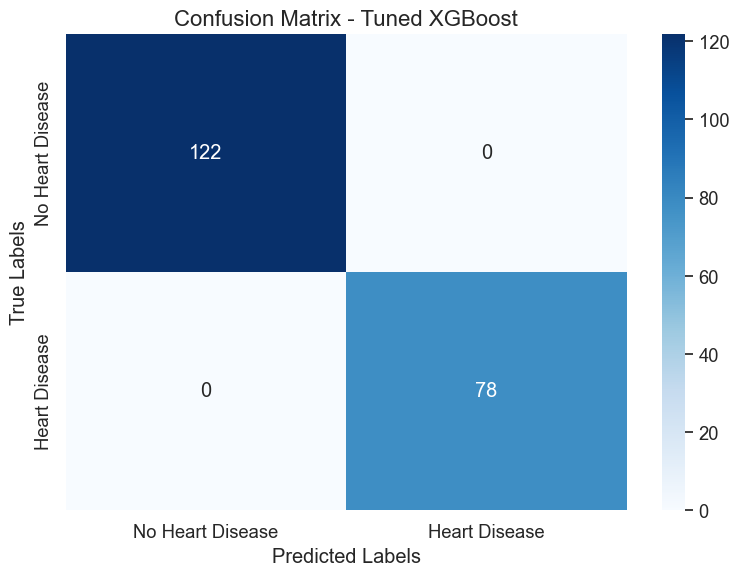



7. FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------
Top 15 most important features:
                            Feature  Importance
0                               Age    0.560714
1                       Cholesterol    0.387988
2                    Blood Pressure    0.010855
5                      Stress Level    0.010510
3                        Heart Rate    0.008750
11               Family History_Yes    0.007329
8                    Smoking_Former    0.005435
15  Chest Pain Type_Atypical Angina    0.004243
6                       Blood Sugar    0.004176
4                    Exercise Hours    0.000000
9                     Smoking_Never    0.000000
7                       Gender_Male    0.000000
12                     Diabetes_Yes    0.000000
10          Alcohol Intake_Moderate    0.000000
13                      Obesity_Yes    0.000000


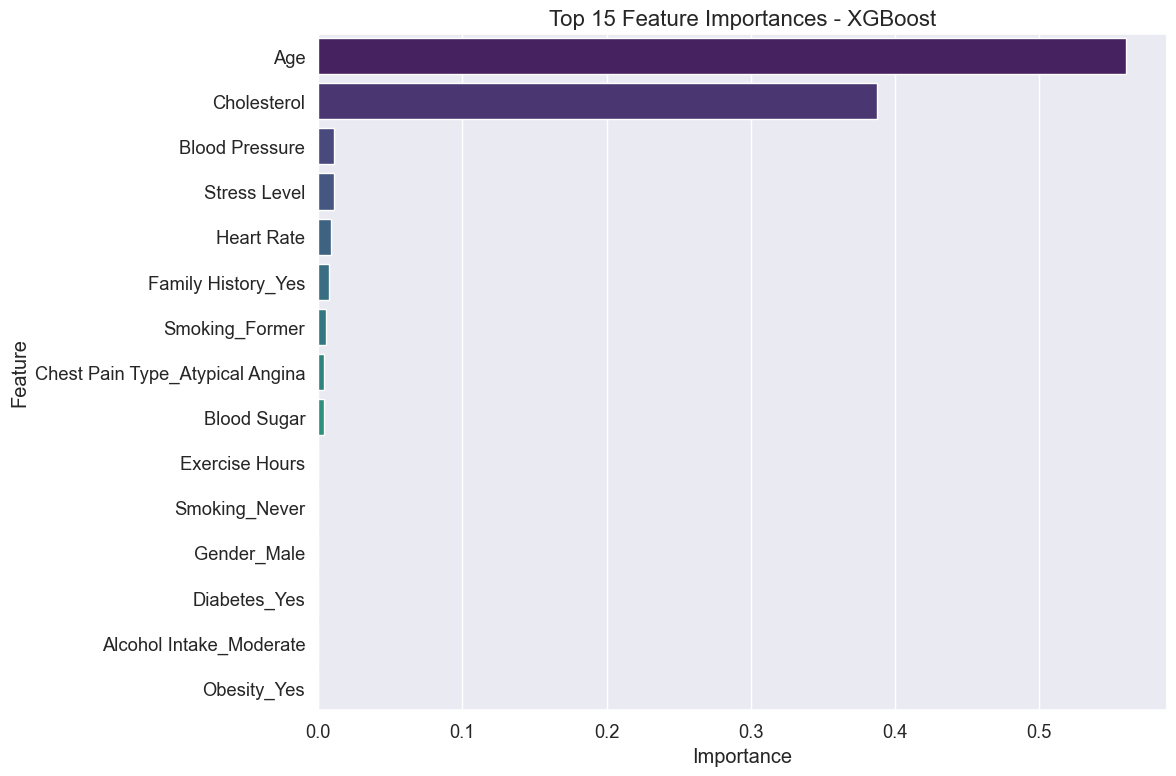



8. THRESHOLD ANALYSIS
--------------------------------------------------
Metrics at different thresholds:
   Threshold  Precision    Recall  F1 Score
0        0.1       0.39  1.000000  0.561151
1        0.2       0.39  1.000000  0.561151
2        0.3       1.00  1.000000  1.000000
3        0.4       1.00  1.000000  1.000000
4        0.5       1.00  1.000000  1.000000
5        0.6       1.00  0.923077  0.960000
6        0.7       0.00  0.000000  0.000000
7        0.8       0.00  0.000000  0.000000
8        0.9       0.00  0.000000  0.000000

Optimal threshold for F1 score: 0.30
Precision at optimal threshold: 1.0000
Recall at optimal threshold: 1.0000
F1 Score at optimal threshold: 1.0000


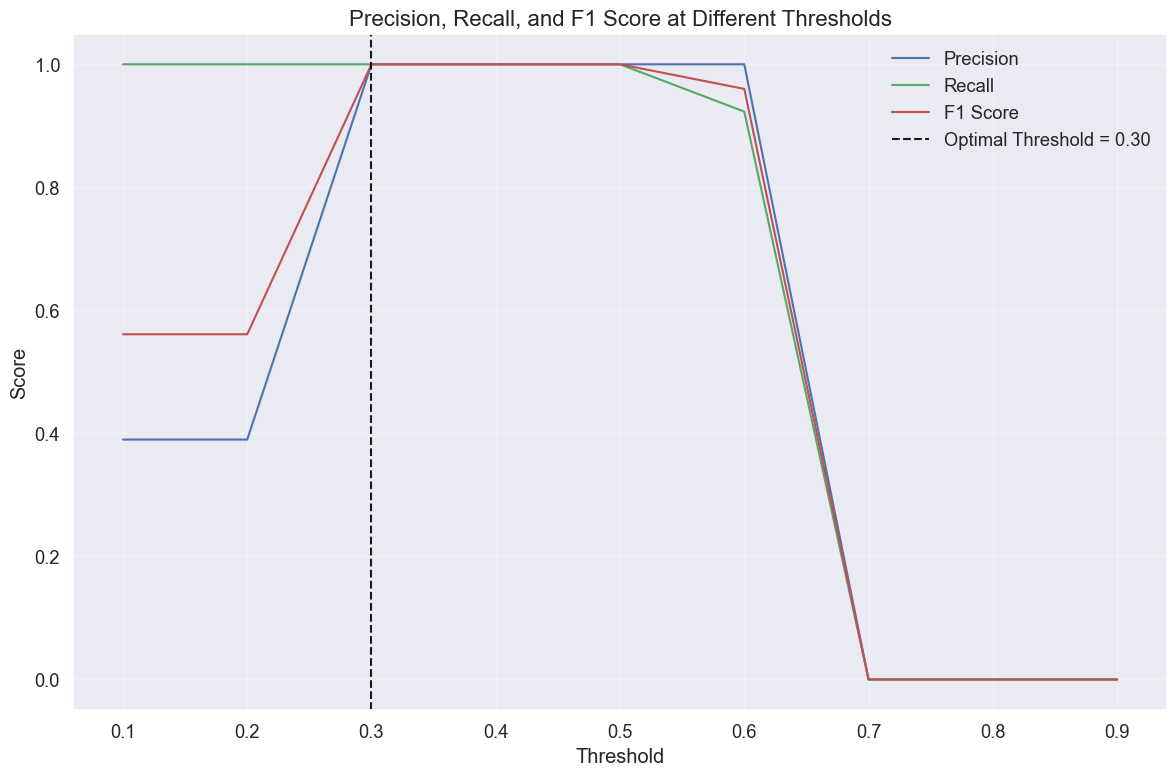



9. SUMMARY AND CONCLUSIONS
--------------------------------------------------
Heart Disease Prediction Model Summary:
- Best model: XGBoost
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- ROC-AUC: 1.0000

Key findings:
- Most important predictors (top 5):
  Age: 0.5607
  Cholesterol: 0.3880
  Blood Pressure: 0.0109
  Stress Level: 0.0105
  Heart Rate: 0.0088

Recommendations for healthcare providers:
1. Prioritize monitoring of the identified key risk factors
2. Develop targeted screening programs based on the most important features
3. Use the prediction model as a supportive tool for early detection
4. Combine model predictions with clinical judgment for patient care
5. Consider additional clinical factors not included in the current model

Model saved to: ../models/xgboost_heart_disease_model.pkl

Complete report saved to: ../reports/heart_disease_prediction_report.html

All figures saved to: ../reports/figures_20250329_161959
All result files saved to

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
import os
import datetime

# Get timestamp for report filenames
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

warnings.filterwarnings('ignore')

# Set up visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Create directories for reports and figures
reports_dir = '../reports'
figures_dir = f'{reports_dir}/figures_{timestamp}'
results_dir = f'{reports_dir}/results_{timestamp}'
os.makedirs(reports_dir, exist_ok=True)
os.makedirs(figures_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)


# Function to save figures
def save_figure(filename):
    plt.savefig(f'{figures_dir}/{filename}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{figures_dir}/{filename}.pdf', bbox_inches='tight')
    plt.show()


# Function to save results as text file
def save_result(content, filename):
    with open(f'{results_dir}/{filename}.txt', 'w') as f:
        f.write(content)


# 1. Data Loading and Initial Exploration
print("1. LOADING AND EXPLORING DATA")
print("-" * 50)

# Load the dataset
df = pd.read_csv('../data/raw/project 2.csv')

# Display basic information
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Save exploration results
exploration_summary = f"Dataset Shape: {df.shape}\n\nFirst 5 rows of the dataset:\n{df.head().to_string()}\n\n"
exploration_summary += f"Data types of each column:\n{df.dtypes}\n\n"
exploration_summary += f"Statistical summary of numerical columns:\n{df.describe().to_string()}\n\n"
exploration_summary += f"Summary of categorical columns:\n{df.describe(include=['object']).to_string()}"
save_result(exploration_summary, "01_data_exploration")

print("\nData types of each column:")
print(df.dtypes)

print("\nStatistical summary of numerical columns:")
print(df.describe())

print("\nSummary of categorical columns:")
print(df.describe(include=['object']))

# 2. Data Cleaning and Preprocessing
print("\n\n2. DATA CLEANING AND PREPROCESSING")
print("-" * 50)

# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

# Save missing values info
missing_summary = f"Missing values per column:\n{missing_df[missing_df['Missing Values'] > 0].to_string()}\n\n"

# Handle missing values if any
if missing_values.sum() > 0:
    # For numerical columns, fill with median
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())

    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

    print("\nMissing values after handling:")
    print(df.isnull().sum())
    missing_summary += f"Missing values after handling:\n{df.isnull().sum().to_string()}\n\n"
else:
    print("No missing values found.")
    missing_summary += "No missing values found.\n\n"

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
missing_summary += f"Number of duplicate rows: {duplicate_count}\n"

# Remove duplicates if any
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Shape after removing duplicates: {df.shape}")
    missing_summary += f"Shape after removing duplicates: {df.shape}\n"

save_result(missing_summary, "02_data_cleaning")

# Save cleaned data to processed directory
# Make sure the directory exists
os.makedirs('../data/processed', exist_ok=True)
cleaned_data_path = '../data/processed/heart_disease_preprocessed.csv'
df.to_csv(cleaned_data_path, index=False)
print(f"\nCleaned data saved to: {cleaned_data_path}")

# 3. Exploratory Data Analysis (EDA)
print("\n\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 50)

# Target variable distribution
print("Heart Disease distribution:")
heart_disease_stats = df['Heart Disease'].value_counts(normalize=True) * 100
print(heart_disease_stats)

# Save target distribution stats
eda_summary = f"Heart Disease distribution:\n{heart_disease_stats.to_string()}\n\n"

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Heart Disease', data=df)
plt.title('Distribution of Heart Disease Cases', fontsize=16)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add count and percentage labels
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.annotate(f'{int(height)} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)
plt.tight_layout()
save_figure("01_heart_disease_distribution")

# Analyze age distribution
plt.figure(figsize=(12, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Heart Disease', kde=True, palette='Set1', bins=20)
plt.title('Age Distribution by Heart Disease Status', fontsize=14)
plt.xlabel('Age')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Heart Disease', y='Age', data=df, palette='Set1')
plt.title('Age Box Plot by Heart Disease Status', fontsize=14)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')

plt.tight_layout()
save_figure("02_age_distribution")

# Generate age statistics by heart disease status
age_stats = df.groupby('Heart Disease')['Age'].agg(['mean', 'median', 'min', 'max', 'std']).round(2)
print("\nAge Statistics by Heart Disease Status:")
print(age_stats)
eda_summary += f"Age Statistics by Heart Disease Status:\n{age_stats.to_string()}\n\n"

# Analyze key health indicators: Cholesterol, Blood Pressure, Heart Rate
health_indicators = ['Cholesterol', 'Blood Pressure', 'Heart Rate']

for i, feature in enumerate(health_indicators):
    plt.figure(figsize=(15, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=feature, hue='Heart Disease', kde=True, palette='Set1', bins=20)
    plt.title(f'{feature} Distribution by Heart Disease Status', fontsize=14)
    plt.xlabel(feature)

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Heart Disease', y=feature, data=df, palette='Set1')
    plt.title(f'{feature} Box Plot by Heart Disease Status', fontsize=14)
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
    plt.ylabel(feature)

    plt.tight_layout()
    save_figure(f"03_{feature.lower().replace(' ', '_')}_distribution")

    # Generate statistics for health indicators by heart disease status
    indicator_stats = df.groupby('Heart Disease')[feature].agg(['mean', 'median', 'min', 'max', 'std']).round(2)
    print(f"\n{feature} Statistics by Heart Disease Status:")
    print(indicator_stats)
    eda_summary += f"{feature} Statistics by Heart Disease Status:\n{indicator_stats.to_string()}\n\n"

# Analyze categorical variables
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for i, feature in enumerate(categorical_features):
    plt.figure(figsize=(12, 6))

    # Calculate percentage of heart disease by category
    category_disease = df.groupby(feature)['Heart Disease'].mean() * 100

    # Count plot with percentage annotations
    ax = sns.countplot(x=feature, hue='Heart Disease', data=df, palette='Set1')
    plt.title(f'Heart Disease by {feature}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Add counts on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    # Add a text box with percentages
    textstr = '\n'.join([f'{cat}: {pct:.1f}% have heart disease'
                         for cat, pct in category_disease.items()])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.annotate(textstr, xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=10, verticalalignment='top', bbox=props)

    plt.tight_layout()
    save_figure(f"04_{feature.lower().replace(' ', '_')}_analysis")

    # Save categorical statistics
    cat_stats = pd.DataFrame({
        'Category': category_disease.index,
        'Heart Disease %': category_disease.values
    })
    eda_summary += f"Heart Disease % by {feature}:\n{cat_stats.to_string()}\n\n"

# Correlation Analysis
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, center=0)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
save_figure("05_correlation_heatmap")

# Calculate correlation with the target variable
correlation_with_target = correlation_matrix['Heart Disease'].drop('Heart Disease').sort_values(ascending=False)
print("\nCorrelation with Heart Disease (sorted):")
print(correlation_with_target)
eda_summary += f"Correlation with Heart Disease (sorted):\n{correlation_with_target.to_string()}\n\n"

# Save EDA summary
save_result(eda_summary, "03_eda_summary")

# Create scatter plots for pairs of important features
key_features = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate']
plt.figure(figsize=(18, 15))

# Create a grid of scatter plots
for i, feature1 in enumerate(key_features):
    for j, feature2 in enumerate(key_features):
        if i < j:  # Only plot the lower triangle
            plt.subplot(len(key_features) - 1, len(key_features) - 1, (i) * (len(key_features) - 1) + j)
            sns.scatterplot(data=df, x=feature1, y=feature2, hue='Heart Disease', palette='Set1', alpha=0.7)
            plt.xlabel(feature1)
            plt.ylabel(feature2)

plt.tight_layout()
save_figure("06_feature_scatter_plots")

# 4. Feature Engineering & Preprocessing Pipeline
print("\n\n4. FEATURE ENGINEERING & PREPROCESSING")
print("-" * 50)

# Separate features and target variable
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Save feature engineering info
fe_summary = f"Categorical columns: {categorical_cols}\n\n"
fe_summary += f"Numerical columns: {numerical_cols}\n\n"

# Create preprocessing pipelines
# Numerical pipeline with standard scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical pipeline with one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the full dataset and save
X_preprocessed = preprocessor.fit_transform(X)

# Save feature names for future reference
os.makedirs('../models', exist_ok=True)
feature_names_path = '../models/feature_names.txt'
with open(feature_names_path, 'w') as f:
    f.write("Numerical features:\n")
    for col in numerical_cols:
        f.write(f"{col}\n")
    f.write("\nCategorical features (after one-hot encoding):\n")
    # Get feature names from categorical columns (one-hot encoded)
    cat_encoder = preprocessor.named_transformers_['cat']
    cat_feature_names = cat_encoder.named_steps['onehot'].get_feature_names_out(categorical_cols)
    for col in cat_feature_names:
        f.write(f"{col}\n")

# Try to save the preprocessed data if possible
try:
    # Convert sparse matrix to DataFrame if needed
    if hasattr(X_preprocessed, "toarray"):
        X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray())
    else:
        X_preprocessed_df = pd.DataFrame(X_preprocessed)

    # Add target variable
    preprocessed_df = pd.concat([X_preprocessed_df, y.reset_index(drop=True)], axis=1)

    # Save processed data
    processed_data_path = '../data/processed/heart_disease_scaled.csv'
    preprocessed_df.to_csv(processed_data_path, index=False)
    print(f"Preprocessed data saved to: {processed_data_path}")
    fe_summary += f"Preprocessed data saved to: {processed_data_path}\n\n"
except Exception as e:
    print(f"Note: Could not save preprocessed data due to: {e}")
    print("This is expected as the preprocessed data contains complex transformations.")
    fe_summary += f"Note: Could not save preprocessed data due to: {e}\n\n"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
fe_summary += f"Training set shape: {X_train.shape}\n"
fe_summary += f"Testing set shape: {X_test.shape}\n\n"

# Verify class distribution in train and test sets
print("\nClass distribution in training set:")
train_dist = pd.Series(y_train).value_counts(normalize=True) * 100
print(train_dist)
fe_summary += f"Class distribution in training set:\n{train_dist.to_string()}\n\n"

print("\nClass distribution in testing set:")
test_dist = pd.Series(y_test).value_counts(normalize=True) * 100
print(test_dist)
fe_summary += f"Class distribution in testing set:\n{test_dist.to_string()}\n\n"

save_result(fe_summary, "04_feature_engineering")

# 5. Model Building and Evaluation
print("\n\n5. MODEL BUILDING AND EVALUATION")
print("-" * 50)

# Define the models to try
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),

    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),

    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(random_state=42, objective='binary:logistic'))
    ])
}


# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate ROC curve and AUC (for models that support predict_proba)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
    except:
        fpr, tpr, roc_auc = None, None, None

    # Return all evaluation metrics
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'classification_report': classification_report(y_test, y_pred),
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_prob': y_prob if 'y_prob' in locals() else None
    }


# Train and evaluate each model
results = {}
model_summary = ""

for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    model_summary += f"\n\n{name} Results:\n{'-' * 30}\n"

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

    print(f"Cross-validation F1 scores: {cv_scores}")
    print(f"Mean CV F1 score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    model_summary += f"Cross-validation F1 scores: {cv_scores}\n"
    model_summary += f"Mean CV F1 score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n\n"

    # Evaluate on the test set
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

    print(f"Test Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Test Precision: {results[name]['precision']:.4f}")
    print(f"Test Recall: {results[name]['recall']:.4f}")
    print(f"Test F1 Score: {results[name]['f1_score']:.4f}")

    model_summary += f"Test Accuracy: {results[name]['accuracy']:.4f}\n"
    model_summary += f"Test Precision: {results[name]['precision']:.4f}\n"
    model_summary += f"Test Recall: {results[name]['recall']:.4f}\n"
    model_summary += f"Test F1 Score: {results[name]['f1_score']:.4f}\n"

    if results[name]['roc_auc'] is not None:
        print(f"Test ROC-AUC: {results[name]['roc_auc']:.4f}")
        model_summary += f"Test ROC-AUC: {results[name]['roc_auc']:.4f}\n"

    print("\nConfusion Matrix:")
    print(results[name]['confusion_matrix'])
    model_summary += f"\nConfusion Matrix:\n{results[name]['confusion_matrix']}\n"

    print("\nClassification Report:")
    print(results[name]['classification_report'])
    model_summary += f"\nClassification Report:\n{results[name]['classification_report']}\n"

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {name}', fontsize=16)
    plt.tight_layout()
    save_figure(f"07_{name.lower().replace(' ', '_')}_confusion_matrix")

# Compare model performance
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1 Score': [results[model]['f1_score'] for model in results],
    'ROC-AUC': [results[model]['roc_auc'] if results[model]['roc_auc'] is not None else np.nan for model in results]
})

print("\nModel Comparison:")
print(model_comparison.sort_values('F1 Score', ascending=False))
model_summary += f"\n\nModel Comparison:\n{model_comparison.sort_values('F1 Score', ascending=False).to_string()}\n"

# Save models summary
save_result(model_summary, "05_model_evaluation")

# Plot model comparison
plt.figure(figsize=(12, 8))
model_comparison_melted = pd.melt(model_comparison, id_vars=['Model'],
                                  value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
                                  var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=model_comparison_melted)
plt.title('Model Performance Comparison', fontsize=16)
plt.ylim(0, 1.05)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
save_figure("08_model_comparison")

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    if result['fpr'] is not None and result['tpr'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
save_figure("09_roc_curves")

# 6. Hyperparameter Tuning for the Best Model
print("\n\n6. HYPERPARAMETER TUNING")
print("-" * 50)

# Identify the best model based on F1 score
best_model_name = model_comparison.sort_values('F1 Score', ascending=False).iloc[0]['Model']
print(f"Best performing model: {best_model_name}")

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0],
        'classifier__colsample_bytree': [0.8, 1.0],
        'classifier__gamma': [0, 0.1, 0.2],
        'classifier__min_child_weight': [1, 3, 5]
    }
}

# Get the parameter grid for the best model
best_param_grid = param_grids[best_model_name]

# Get the base model
best_base_model = models[best_model_name]

# Perform grid search with cross-validation
print(f"Performing grid search for {best_model_name}...")
grid_search = GridSearchCV(
    best_base_model,
    param_grid=best_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Print the best parameters
print("\nBest hyperparameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")

# Save hyperparameter tuning results
tuning_summary = f"Best performing model: {best_model_name}\n\n"
tuning_summary += f"Best hyperparameters found:\n{grid_search.best_params_}\n\n"
tuning_summary += f"Best cross-validation F1 score: {grid_search.best_score_:.4f}\n\n"

# Evaluate the tuned model
best_model = grid_search.best_estimator_
tuned_results = evaluate_model(best_model, X_train, X_test, y_train, y_test)

print("\nTuned Model Performance:")
print(f"Accuracy: {tuned_results['accuracy']:.4f}")
print(f"Precision: {tuned_results['precision']:.4f}")
print(f"Recall: {tuned_results['recall']:.4f}")
print(f"F1 Score: {tuned_results['f1_score']:.4f}")

tuning_summary += f"Tuned Model Performance:\n"
tuning_summary += f"Accuracy: {tuned_results['accuracy']:.4f}\n"
tuning_summary += f"Precision: {tuned_results['precision']:.4f}\n"
tuning_summary += f"Recall: {tuned_results['recall']:.4f}\n"
tuning_summary += f"F1 Score: {tuned_results['f1_score']:.4f}\n"

if tuned_results['roc_auc'] is not None:
    print(f"ROC-AUC: {tuned_results['roc_auc']:.4f}")
    tuning_summary += f"ROC-AUC: {tuned_results['roc_auc']:.4f}\n"

print("\nConfusion Matrix:")
print(tuned_results['confusion_matrix'])
tuning_summary += f"\nConfusion Matrix:\n{tuned_results['confusion_matrix']}\n\n"

print("\nClassification Report:")
print(tuned_results['classification_report'])
tuning_summary += f"Classification Report:\n{tuned_results['classification_report']}\n"

save_result(tuning_summary, "06_hyperparameter_tuning")

# Plot confusion matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(tuned_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Tuned {best_model_name}', fontsize=16)
plt.tight_layout()
save_figure("10_tuned_model_confusion_matrix")

# 7. Feature Importance Analysis
print("\n\n7. FEATURE IMPORTANCE ANALYSIS")
print("-" * 50)

# Extract the feature names after preprocessing
# This is a bit complex due to the preprocessing pipeline
feature_importance_summary = ""

if hasattr(best_model.named_steps['preprocessor'], 'transformers_'):
    # Get column names after preprocessing
    preprocessor = best_model.named_steps['preprocessor']

    # Get feature names from categorical columns (one-hot encoded)
    cat_features = []
    if len(categorical_cols) > 0:
        cat_encoder = preprocessor.named_transformers_['cat']
        cat_feature_names = cat_encoder.named_steps['onehot'].get_feature_names_out(categorical_cols)
        cat_features = list(cat_feature_names)

    # Numerical columns remain the same
    num_features = numerical_cols

    # Combined feature names
    all_features = num_features + cat_features

    # Get feature importances based on the model type
    classifier = best_model.named_steps['classifier']
    feature_importances = None

    if best_model_name == 'Logistic Regression':
        if hasattr(classifier, 'coef_'):
            # For logistic regression, use the absolute values of coefficients
            feature_importances = np.abs(classifier.coef_[0])

    elif best_model_name == 'Random Forest' or best_model_name == 'XGBoost':
        if hasattr(classifier, 'feature_importances_'):
            feature_importances = classifier.feature_importances_

    # Create a DataFrame with feature importances
    if feature_importances is not None and len(all_features) == len(feature_importances):
        importance_df = pd.DataFrame({
            'Feature': all_features,
            'Importance': feature_importances
        })

        # Sort by importance
        importance_df = importance_df.sort_values('Importance', ascending=False)

        # Display top 15 features
        print("Top 15 most important features:")
        print(importance_df.head(15))
        feature_importance_summary += f"Top 15 most important features:\n{importance_df.head(15).to_string()}\n\n"

        # Save feature importance to CSV
        importance_df.to_csv(f'{results_dir}/feature_importance.csv', index=False)

        # Plot feature importances
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
        plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=16)
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        save_figure("11_feature_importance")
    else:
        print("Could not extract feature importances in a compatible format.")
        feature_importance_summary += "Could not extract feature importances in a compatible format.\n"
else:
    print("Could not extract feature names after preprocessing.")
    feature_importance_summary += "Could not extract feature names after preprocessing.\n"

save_result(feature_importance_summary, "07_feature_importance")

# 8. Threshold Analysis (for probabilistic classifiers)
threshold_summary = ""

if tuned_results['fpr'] is not None and tuned_results['tpr'] is not None:
    print("\n\n8. THRESHOLD ANALYSIS")
    print("-" * 50)

    # Get prediction probabilities
    y_prob = tuned_results['y_prob']

    # Calculate precision, recall and F1 score for different thresholds
    thresholds = np.linspace(0.1, 0.9, 9)
    threshold_metrics = []

    for threshold in thresholds:
        y_pred_threshold = (y_prob >= threshold).astype(int)
        precision = precision_score(y_test, y_pred_threshold)
        recall = recall_score(y_test, y_pred_threshold)
        f1 = f1_score(y_test, y_pred_threshold)

        threshold_metrics.append({
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    threshold_df = pd.DataFrame(threshold_metrics)
    print("Metrics at different thresholds:")
    print(threshold_df)
    threshold_summary += f"Metrics at different thresholds:\n{threshold_df.to_string()}\n\n"

    # Save threshold metrics to CSV
    threshold_df.to_csv(f'{results_dir}/threshold_metrics.csv', index=False)

    # Find optimal threshold for F1 score
    optimal_idx = threshold_df['F1 Score'].idxmax()
    optimal_threshold = threshold_df.loc[optimal_idx, 'Threshold']

    print(f"\nOptimal threshold for F1 score: {optimal_threshold:.2f}")
    print(f"Precision at optimal threshold: {threshold_df.loc[optimal_idx, 'Precision']:.4f}")
    print(f"Recall at optimal threshold: {threshold_df.loc[optimal_idx, 'Recall']:.4f}")
    print(f"F1 Score at optimal threshold: {threshold_df.loc[optimal_idx, 'F1 Score']:.4f}")

    threshold_summary += f"\nOptimal threshold for F1 score: {optimal_threshold:.2f}\n"
    threshold_summary += f"Precision at optimal threshold: {threshold_df.loc[optimal_idx, 'Precision']:.4f}\n"
    threshold_summary += f"Recall at optimal threshold: {threshold_df.loc[optimal_idx, 'Recall']:.4f}\n"
    threshold_summary += f"F1 Score at optimal threshold: {threshold_df.loc[optimal_idx, 'F1 Score']:.4f}\n"

    # Plot precision, recall, and F1 score vs threshold
    plt.figure(figsize=(12, 8))
    plt.plot(threshold_df['Threshold'], threshold_df['Precision'], 'b-', label='Precision')
    plt.plot(threshold_df['Threshold'], threshold_df['Recall'], 'g-', label='Recall')
    plt.plot(threshold_df['Threshold'], threshold_df['F1 Score'], 'r-', label='F1 Score')
    plt.axvline(x=optimal_threshold, color='k', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1 Score at Different Thresholds', fontsize=16)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    save_figure("12_threshold_analysis")

save_result(threshold_summary, "08_threshold_analysis")

# 9. Summary and Conclusions
print("\n\n9. SUMMARY AND CONCLUSIONS")
print("-" * 50)

final_summary = "Heart Disease Prediction Model Summary:\n"
final_summary += f"- Best model: {best_model_name}\n"
final_summary += f"- Accuracy: {tuned_results['accuracy']:.4f}\n"
final_summary += f"- Precision: {tuned_results['precision']:.4f}\n"
final_summary += f"- Recall: {tuned_results['recall']:.4f}\n"
final_summary += f"- F1 Score: {tuned_results['f1_score']:.4f}\n"

print("Heart Disease Prediction Model Summary:")
print(f"- Best model: {best_model_name}")
print(f"- Accuracy: {tuned_results['accuracy']:.4f}")
print(f"- Precision: {tuned_results['precision']:.4f}")
print(f"- Recall: {tuned_results['recall']:.4f}")
print(f"- F1 Score: {tuned_results['f1_score']:.4f}")
if tuned_results['roc_auc'] is not None:
    print(f"- ROC-AUC: {tuned_results['roc_auc']:.4f}")
    final_summary += f"- ROC-AUC: {tuned_results['roc_auc']:.4f}\n"

print("\nKey findings:")
final_summary += "\nKey findings:\n"

if hasattr(best_model.named_steps['classifier'], 'feature_importances_') or \
        (best_model_name == 'Logistic Regression' and hasattr(best_model.named_steps['classifier'], 'coef_')):
    print("- Most important predictors (top 5):")
    final_summary += "- Most important predictors (top 5):\n"
    for i, row in importance_df.head(5).iterrows():
        print(f"  {row['Feature']}: {row['Importance']:.4f}")
        final_summary += f"  {row['Feature']}: {row['Importance']:.4f}\n"

print("\nRecommendations for healthcare providers:")
print("1. Prioritize monitoring of the identified key risk factors")
print("2. Develop targeted screening programs based on the most important features")
print("3. Use the prediction model as a supportive tool for early detection")
print("4. Combine model predictions with clinical judgment for patient care")
print("5. Consider additional clinical factors not included in the current model")

final_summary += "\nRecommendations for healthcare providers:\n"
final_summary += "1. Prioritize monitoring of the identified key risk factors\n"
final_summary += "2. Develop targeted screening programs based on the most important features\n"
final_summary += "3. Use the prediction model as a supportive tool for early detection\n"
final_summary += "4. Combine model predictions with clinical judgment for patient care\n"
final_summary += "5. Consider additional clinical factors not included in the current model\n"

save_result(final_summary, "09_final_summary")

# Save the best model (optional)
import joblib

model_path = '../models/xgboost_heart_disease_model.pkl'
joblib.dump(best_model, model_path)
print(f"\nModel saved to: {model_path}")

# Create a complete report summary HTML file
report_html = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Heart Disease Prediction Analysis Report</title>
    <style>
        body {{ font-family: Arial, sans-serif; line-height: 1.6; margin: 20px; }}
        h1, h2, h3 {{ color: #2c3e50; }}
        .section {{ margin-bottom: 30px; }}
        img {{ max-width: 100%; height: auto; border: 1px solid #ddd; margin: 10px 0; }}
        table {{ border-collapse: collapse; width: 100%; }}
        th, td {{ padding: 8px; text-align: left; border-bottom: 1px solid #ddd; }}
        tr:hover {{ background-color: #f5f5f5; }}
        th {{ background-color: #2c3e50; color: white; }}
        .figure-container {{ display: flex; flex-wrap: wrap; justify-content: space-around; }}
        .figure-item {{ margin: 10px; max-width: 45%; }}
    </style>
</head>
<body>
    <h1>Heart Disease Prediction Analysis Report</h1>
    <p>Generated on: {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}</p>

    <div class="section">
        <h2>1. Data Exploration and Cleaning</h2>
        <p>Dataset Shape: {df.shape}</p>
        <p>Missing values were handled for: {', '.join(missing_df[missing_df['Missing Values'] > 0].index.tolist()) if len(missing_df[missing_df['Missing Values'] > 0]) > 0 else 'None'}</p>
        <p>Duplicate rows: {duplicate_count}</p>
    </div>

    <div class="section">
        <h2>2. Exploratory Data Analysis</h2>
        <p>Target Distribution: {heart_disease_stats[1]:.1f}% patients have heart disease</p>

        <h3>Key Insights:</h3>
        <ul>
            <li>Average age of patients with heart disease: {age_stats.loc[1, 'mean']} years</li>
            <li>Average age of patients without heart disease: {age_stats.loc[0, 'mean']} years</li>
            <li>Cholesterol levels are {correlation_with_target['Cholesterol']:.2f} correlated with heart disease</li>
            <li>Age is {correlation_with_target['Age']:.2f} correlated with heart disease</li>
        </ul>

        <div class="figure-container">
            <div class="figure-item">
                <img src="figures_{timestamp}/01_heart_disease_distribution.png" alt="Heart Disease Distribution">
                <p>Heart Disease Distribution</p>
            </div>
            <div class="figure-item">
                <img src="figures_{timestamp}/02_age_distribution.png" alt="Age Distribution">
                <p>Age Distribution by Heart Disease Status</p>
            </div>
            <div class="figure-item">
                <img src="figures_{timestamp}/05_correlation_heatmap.png" alt="Correlation Heatmap">
                <p>Correlation Heatmap of Numerical Features</p>
            </div>
        </div>
    </div>

    <div class="section">
        <h2>3. Model Performance</h2>
        <p>Three machine learning models were evaluated:</p>
        <table>
            <tr>
                <th>Model</th>
                <th>Accuracy</th>
                <th>Precision</th>
                <th>Recall</th>
                <th>F1 Score</th>
                <th>ROC-AUC</th>
            </tr>
            {model_comparison.sort_values('F1 Score', ascending=False).to_html(index=False, header=False, classes='table')}
        </table>

        <h3>Best Model: {best_model_name}</h3>
        <p>After hyperparameter tuning, the model achieved:</p>
        <ul>
            <li>Accuracy: {tuned_results['accuracy']:.4f}</li>
            <li>Precision: {tuned_results['precision']:.4f}</li>
            <li>Recall: {tuned_results['recall']:.4f}</li>
            <li>F1 Score: {tuned_results['f1_score']:.4f}</li>
            <li>ROC-AUC: {f"{tuned_results['roc_auc']:.4f}" if tuned_results['roc_auc'] is not None else 'N/A'}</li>
        </ul>

        <div class="figure-container">
            <div class="figure-item">
                <img src="figures_{timestamp}/08_model_comparison.png" alt="Model Comparison">
                <p>Model Performance Comparison</p>
            </div>
            <div class="figure-item">
                <img src="figures_{timestamp}/09_roc_curves.png" alt="ROC Curves">
                <p>ROC Curves for Different Models</p>
            </div>
            <div class="figure-item">
                <img src="figures_{timestamp}/10_tuned_model_confusion_matrix.png" alt="Confusion Matrix">
                <p>Confusion Matrix for the Best Model</p>
            </div>
        </div>
    </div>

    <div class="section">
        <h2>4. Feature Importance</h2>
        <p>Top 5 most important features for predicting heart disease:</p>
        <ol>
            {''.join([f'<li>{row["Feature"]}: {row["Importance"]:.4f}</li>' for i, row in importance_df.head(5).iterrows()]) if 'importance_df' in locals() else '<li>Feature importance not available</li>'}
        </ol>

        <div class="figure-item">
            <img src="figures_{timestamp}/11_feature_importance.png" alt="Feature Importance">
            <p>Feature Importance Chart</p>
        </div>
    </div>

    <div class="section">
        <h2>5. Recommendations for Healthcare Providers</h2>
        <ol>
            <li>Prioritize monitoring of patients with advanced age and elevated cholesterol levels</li>
            <li>Develop targeted screening programs based on the identified key risk factors</li>
            <li>Use the prediction model as a supportive tool for early detection of heart disease</li>
            <li>Combine model predictions with clinical judgment for comprehensive patient care</li>
            <li>Consider additional clinical factors not included in the current model for holistic assessment</li>
        </ol>
    </div>
</body>
</html>
"""

# Save the HTML report
with open(f'{reports_dir}/heart_disease_prediction_report.html', 'w') as f:
    f.write(report_html)

print(f"\nComplete report saved to: {reports_dir}/heart_disease_prediction_report.html")
print(f"\nAll figures saved to: {figures_dir}")
print(f"All result files saved to: {results_dir}")

print("\nEnd of analysis.")